## Generate And gate data


In [81]:
import pandas as pd
import numpy as np

def generate_and_gate_data(filename, num_rows=1024):
    # Generate random input data between 0 and 1 for 5 columns
    num_cols = 4
    # input_data = np.random.rand(num_rows, num_cols)
    # Generate random input data between 0 and 1, rounded to 4 decimal places
    input_data = np.round(np.random.rand(num_rows, num_cols), 4)
    
    # Convert inputs to binary based on the threshold 0.5
    binary_inputs = (input_data >= 0.5).astype(int)
    
    # Calculate the AND operation across the 5 input columns for y_label
    y_label = np.all(binary_inputs == 1, axis=1).astype(int)
    
    # Create a DataFrame with the inputs and the label
    df = pd.DataFrame(input_data, columns=[f"input_{i+1}" for i in range(num_cols)])
    # df = pd.DataFrame(binary_inputs, columns=[f"input_{i+1}" for i in range(num_cols)])
    df["y_label"] = y_label
    
    display(df.head())
    
    # Save to a CSV file
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Generate the data and save it to 'and_gate_data.csv'
generate_and_gate_data("and_gate_data.csv")


,input_1,input_2,input_3,input_4,y_label
0,0.5493,0.6217,0.6121,0.3815,0
1,0.5843,0.6314,0.1762,0.5983,0
2,0.6118,0.9195,0.7363,0.7130,1
3,0.8093,0.3170,0.6077,0.7166,0
4,0.3224,0.8702,0.6684,0.8663,0


Data saved to and_gate_data.csv


## Perceptron Algorithm (3 approaches) on and gate dataset


Adapt Weights:
Weights: [1.9988 1.4384 2.1839 1.5987]
Bias: -5.299999999999931
Accuracy: 96.10%
Unique Labels: [0. 1.]
Confusion Matrix:


array([[187,   6],
       [  2,  10]], dtype=int64)

<Figure size 600x600 with 0 Axes>

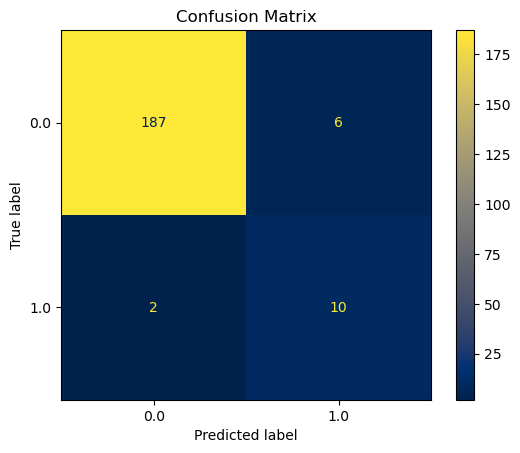

Adapt Weights Modified:
Weights: [0.057025 0.054518 0.051115 0.044245]
Bias: -0.17
Accuracy: 97.07%
Unique Labels: [0. 1.]
Confusion Matrix:


array([[193,   0],
       [  6,   6]], dtype=int64)

<Figure size 600x600 with 0 Axes>

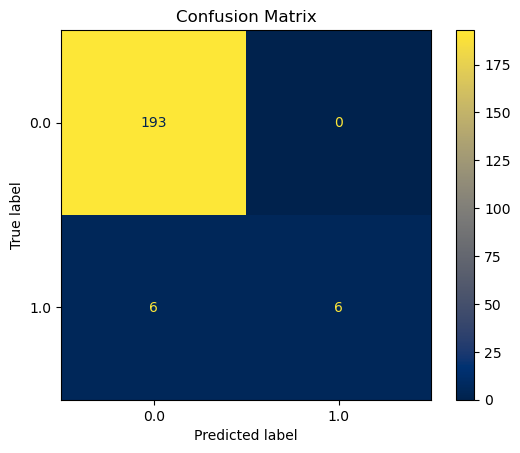

Widrow Hoff delta
Weights: [0.057025 0.054518 0.051115 0.044245]
Bias: -0.17
Accuracy: 97.07%
Unique Labels: [0. 1.]
Confusion Matrix:


array([[193,   0],
       [  6,   6]], dtype=int64)

<Figure size 600x600 with 0 Axes>

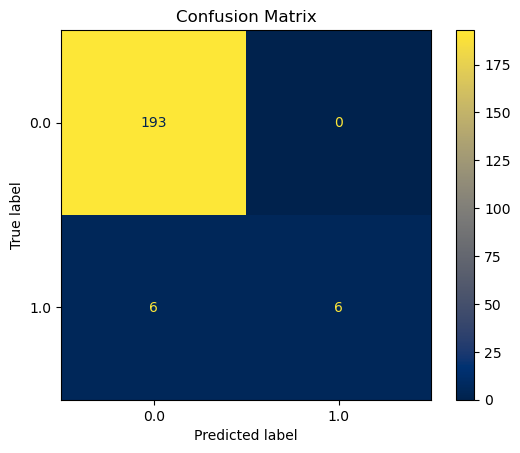

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

class Perceptron:
    def __init__(self, method):
        self.method = method
    
    # Activation function
    def sign_function(self, x):
        return 1 if x >= 0 else 0
    
    # Perceptron learning algorithm
    def perceptron_learning(self, X, y, lr=0.01, epochs=100):
        weights = np.zeros(X.shape[1])
        bias = 0
        for _ in range(epochs):
            for xi, target in zip(X, y):
                output = self.sign_function(np.dot(weights, xi) + bias)  
                
                # 'Adapt Weights'
                if self.method == 1:              
                    if output == 0 and target == 1:
                        weights += xi
                    if output == 1 and target == 0:
                        weights -= xi
                # 'Adapt Weights Modified'   
                elif self.method == 2:
                    if output == 0 and target == 1:
                        weights += lr*xi
                    if output == 1 and target == 0:
                        weights -= lr*xi   
                # 'Widrow Hoff delta'
                elif self.method == 3:
                    weights += lr*(target - output)*xi
                
                bias += lr * (target - output)
        return weights, bias
    
    # Training
    def train(self, X, y, epoch=100):
        self.weights, self.bias = self.perceptron_learning(X, y, epochs=epoch)
        print("Weights:", self.weights)
        print("Bias:", self.bias)
        
    def test(self, X, y):
        # Testing
        output = []
        for xi in X:
            predicted = self.sign_function(np.dot(self.weights, xi) + self.bias)
            output.append(predicted)
        return np.array(output)

# Load the dataset
# df = pd.read_csv("and_gate_7_columns.csv")
# df = pd.read_csv("and_gate_3_col_table.csv")
df = pd.read_csv('and_gate_data.csv')

# Split data into features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column (Output)

def train_evaluate_Perceptron(method, X, y):
    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert X_train and X_test to NumPy arrays
    X_train_np = X_train.to_numpy()
    X_test_np = X_test.to_numpy()

    # Train and test the perceptron
    p = Perceptron(method=method)
    p.train(X_train_np, y_train.to_numpy())  # Ensure y_train is also converted to NumPy
    y_pred = p.test(X_test_np, y_test.to_numpy())  # Ensure y_test is converted to NumPy

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")


    # Extract unique labels from the test set for dynamic display
    # unique_labels = np.unique(np.concatenate([y_test, y_pred]))
    unique_labels = np.array([0., 1.])
    print(f"Unique Labels: {unique_labels}")
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)
    print("Confusion Matrix:")
    display(conf_matrix)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                           display_labels=unique_labels
                           ).plot(cmap="cividis", values_format='d', colorbar=True)
    plt.title("Confusion Matrix")
    plt.show()


print('Adapt Weights:')    
train_evaluate_Perceptron(1, X, y)
print('Adapt Weights Modified:')
train_evaluate_Perceptron(2, X, y)
print('Widrow Hoff delta')
train_evaluate_Perceptron(3, X, y)

## 1st Way: Basic Perceptron Learning Algorithm


Weights: [1. 1.]
Bias: -1.2
Accuracy: 1.0

Results DataFrame:


,Input1,Input2,Actual Output,Predicted Output
0,0,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,1,1,1


<Figure size 600x600 with 0 Axes>

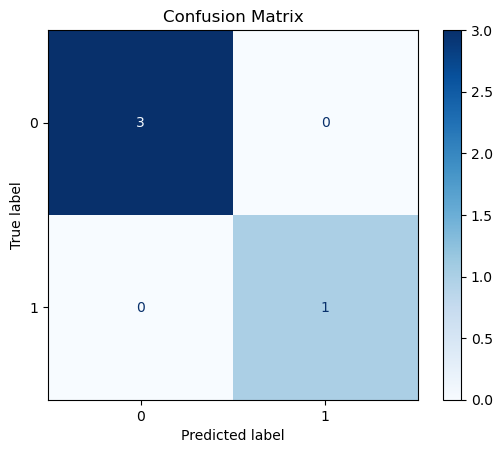

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Activation function
def sign_function(x):
    return 1 if x >= 0 else 0

# Perceptron learning algorithm
def perceptron_learning(X, y, lr=0.1, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0

    for _ in range(epochs):
        for xi, target in zip(X, y):
            output = sign_function(np.dot(weights, xi) + bias)
            
            if output==0 and target==1:
                weights += xi
            if output==1 and target==0:
                weights -= xi
                
            bias += lr * (target - output)

    return weights, bias

# AND gate dataset
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([0, 0, 0, 1])

# Training
weights, bias = perceptron_learning(X, y)

print("Weights:", weights)
print("Bias:", bias)

# Testing
output = []
right_no = 0
total = 0
for xi, target in zip(X, y):
    predicted = sign_function(np.dot(weights, xi) + bias)
    output.append( predicted ) 
    if predicted == target:
        right_no += 1
print(f"Accuracy: {right_no/y.shape[0]}")
    
results_df = pd.DataFrame({
    "Input1": X[:, 0],
    "Input2": X[:, 1],
    "Actual Output": y,
    "Predicted Output": output
})

print("\nResults DataFrame:")
display(results_df)


# Generate Confusion Matrix
cm = confusion_matrix(y, output)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
cm_display.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


## 2nd Way: Perceptron with Learning Rate Decay


Weights: [0.10839327 0.19424129]
Bias: -0.2866950579431708
Accuracy: 1.0

Results DataFrame:


,Input1,Input2,Actual Output,Predicted Output
0,0,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,1,1,1


<Figure size 600x600 with 0 Axes>

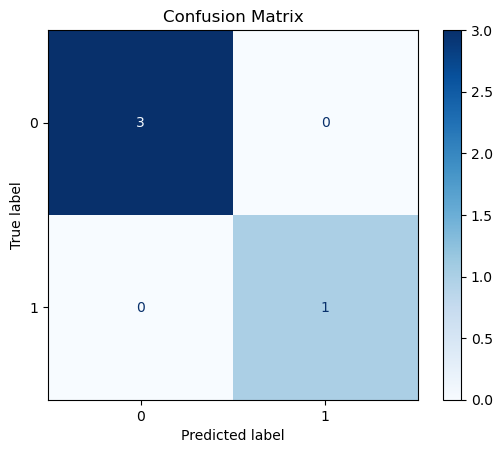

In [2]:
# Perceptron with Learning Rate Decay
def perceptron_with_lr_decay(X, y, lr=0.1, decay=0.01, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0

    for epoch in range(epochs):
        lr = lr / (1 + decay * epoch)  # Adjust learning rate
        for xi, target in zip(X, y):
            output = sign_function(np.dot(weights, xi) + bias)
            error = target - output
            if output==0 and target==1:
                weights += lr*xi
            if output==1 and target==0:
                weights -= lr*xi
            bias += lr * error

    return weights, bias

# AND gate dataset
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([0, 0, 0, 1])

# Training
weights, bias = perceptron_with_lr_decay(X, y)

print("Weights:", weights)
print("Bias:", bias)

# Testing
output = []
right_no = 0
total = 0
for xi, target in zip(X, y):
    predicted = sign_function(np.dot(weights, xi) + bias)
    output.append( predicted ) 
    if predicted == target:
        right_no += 1
print(f"Accuracy: {right_no/y.shape[0]}")
    
results_df = pd.DataFrame({
    "Input1": X[:, 0],
    "Input2": X[:, 1],
    "Actual Output": y,
    "Predicted Output": output
})

print("\nResults DataFrame:")
display(results_df)

# Generate Confusion Matrix
cm = confusion_matrix(y, output)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
cm_display.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()



## 3rd Way: Widrow-Hoff Delta Rule for AND Problem


Accuracy: 1.0

Results DataFrame:


,Input1,Input2,Actual Output,Predicted Output
0,0,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,1,1,1


<Figure size 600x600 with 0 Axes>

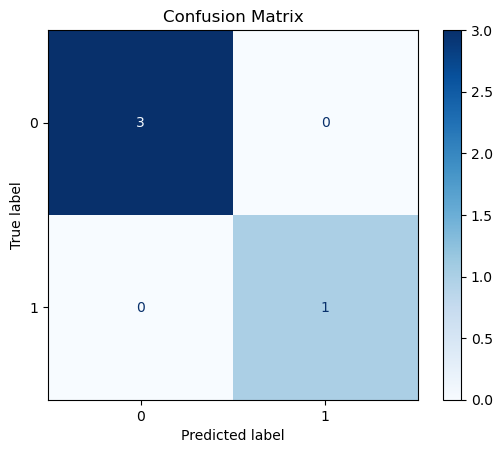

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Activation function (linear for Widrow-Hoff)
def linear_function(x):
    return x  # Linear activation for Widrow-Hoff

# Widrow-Hoff Delta Rule implementation
def widrow_hoff_delta(X, y, lr=0.1, epochs=100):
    weights = np.zeros(X.shape[1])  # Initialize weights
    bias = 0  # Initialize bias
    
    for _ in range(epochs):
        for xi, target in zip(X, y):
            output = linear_function(np.dot(weights, xi) + bias)
            error = target - output
            weights += lr * error * xi  # Update weights
            bias += lr * error          # Update bias
    
    return weights, bias

# AND gate dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])  # Expected outputs for AND logic

# Hyperparameters
learning_rate = 0.1
epochs = 100

# Training using Widrow-Hoff Delta Rule
weights, bias = widrow_hoff_delta(X, y, lr=learning_rate, epochs=epochs)

# Testing the trained perceptron
predictions = []
right_no = 0
for xi, target in zip(X, y):
    # for xi in X:
    output = linear_function(np.dot(weights, xi) + bias)
    prediction = 1 if output >= 0.5 else 0  # Threshold to classify
    predictions.append(prediction)
    if prediction == target:
        right_no += 1
        
print(f"Accuracy: {right_no/y.shape[0]}")

# Create a DataFrame for comparison
results_df = pd.DataFrame({
    "Input1": X[:, 0],
    "Input2": X[:, 1],
    "Actual Output": y,
    "Predicted Output": predictions
})

print("\nResults DataFrame:")
display(results_df)

# Generate Confusion Matrix
cm = confusion_matrix(y, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
cm_display.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


# Diabetics Dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


   Accuracy
0  0.766234


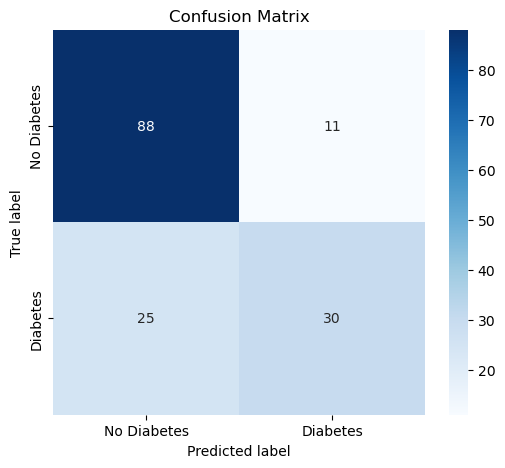

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)
display(data.head())

# Features and target variable
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Perceptron Algorithm Implementation (from scratch)
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        # Initialize weights
        self.weights = np.zeros(X.shape[1])
        
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Linear output
                linear_output = np.dot(X[i], self.weights) + self.bias
                # Activation function (Heaviside step function)
                prediction = 1 if linear_output >= 0 else 0
                # Update weights and bias if there's a mistake
                if prediction != y[i]:
                    update = self.learning_rate * (y[i] - prediction)
                    self.weights += update * X[i]
                    self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Initialize and train Perceptron model
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
perceptron.fit(X_train, y_train)

# Predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy in a Pandas DataFrame
accuracy_df = pd.DataFrame({'Accuracy': [accuracy]})
print(accuracy_df)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
